# seabornを使ったグラフ作成

seaborn公式ガイド：[seaborn - User guide and tutorial](https://seaborn.pydata.org/tutorial.html)

複数グラフをまとめて表示する方法：[Subplotting with matplotlib and seaborn](https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8)

## サンプルデータ取得

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- total_bill : 総支払額(食事代、税込み)　(USドル)
- tip : チップ(USドル)
- sex : 性別
- smoker : 喫煙者か
- day : 曜日(木・金・土・日のいずれか)
- time : 食事の時間
- size : 人数

## 色々なプロット

### 数値と1つ以上のカテゴリー変数の関係(seaborn.catplot)

[seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)

###### 散布図
- [stripplot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)：散布図（数値データ）（カテゴリデータ x 数値データ）。`size=`でドットのサイズ（デフォルトは5）、`alpha=`で不透明度を指定。`dodge=True`でhue変数ごとに場所を分けて描く。
- [swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot)：ドットが重ならないよう並んだ散布図（数値データ）（カテゴリデータ x 数値データ）。size, dodgeの使い方はstripplotと同じ。

###### 分布プロット
- [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)：ボックスプロット（数値データ）（カテゴリデータ x 数値データ）。
- [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot)：バイオリンプロット（数値データ）（カテゴリデータ x 数値データ）。散布図を重ねると良いかも。`split=True`でhue変数間での分割バイオリンにする。

###### 統計量プロット
- [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)：データの件数の棒グラフ（カテゴリデータ）。
- [barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot)：統計量と信頼区間の棒グラフ（数値データ）（カテゴリデータ x 数値データ）。`estimator`で統計量の計算方法、`ci`で信頼区間を指定できる。デフォルトは平均値とbootstrapによる95%信頼区間。`ci = 'sd'`で標準偏差を使用、`ci = None`でエラーバーなし。
- [pontplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot)：統計量と信頼区間のドットプロット（数値データ）（カテゴリデータ x 数値データ）。`estimator`と`ci`の使い方はbarplotと同じ。`join=False`で点同士をつなぐ線を表示しない。

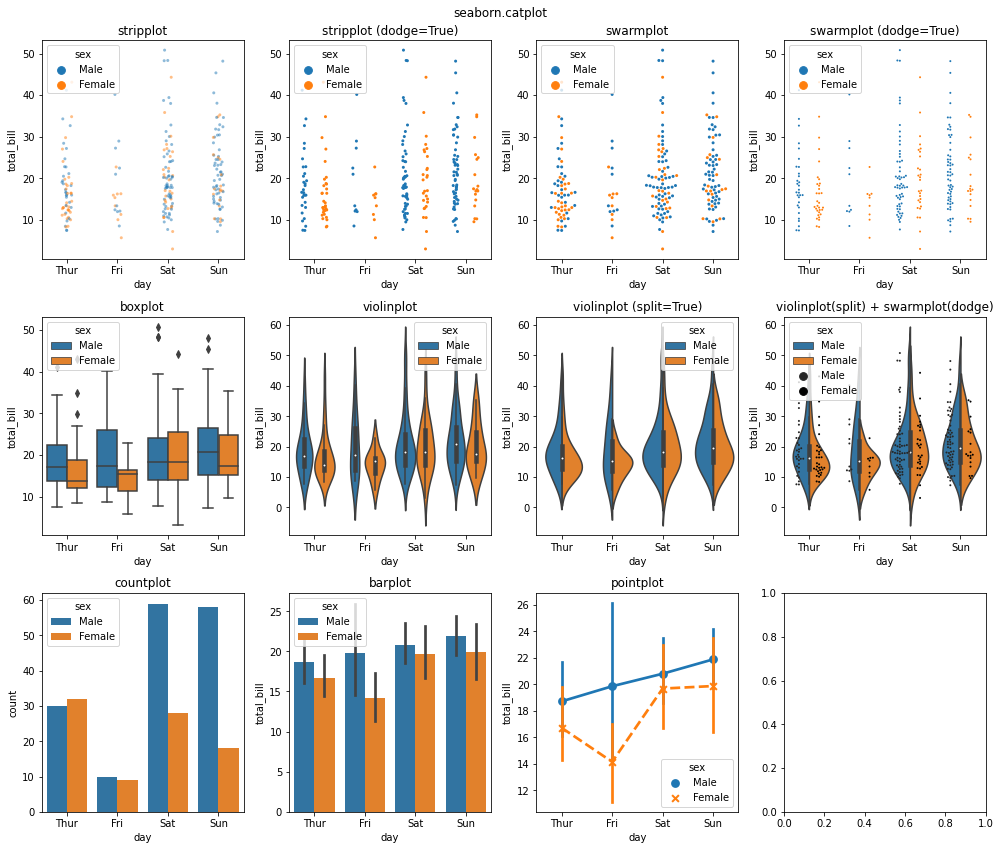

In [12]:
fig, axes = plt.subplots(3, 4, figsize=(14, 12))
fig.suptitle('seaborn.catplot')

# 散布図
axes[0,0].set_title('stripplot')
sns.stripplot(data=tips, x="day", y="total_bill", hue='sex', size=3, alpha=0.5, ax=axes[0,0])
axes[0,1].set_title('stripplot (dodge=True)')
sns.stripplot(data=tips, x="day", y="total_bill", hue='sex', size=3, dodge=True, ax=axes[0,1])
axes[0,2].set_title('swarmplot')
sns.swarmplot(data=tips, x="day", y="total_bill", hue="sex", size=3, ax=axes[0,2])
axes[0,3].set_title('swarmplot (dodge=True)')
sns.swarmplot(data=tips, x="day", y="total_bill", hue="sex", size=2, dodge=True, ax=axes[0,3])

# 分布プロット
axes[1,0].set_title('boxplot')
sns.boxplot(data=tips, x="day", y="total_bill", hue='sex', ax=axes[1,0])
axes[1,1].set_title('violinplot')
sns.violinplot(data=tips, x="day", y="total_bill", hue='sex', ax=axes[1,1])
axes[1,2].set_title('violinplot (split=True)')
sns.violinplot(data=tips, x="day", y="total_bill", hue='sex', split=True, ax=axes[1,2])
axes[1,3].set_title('violinplot(split) + swarmplot(dodge)')
sns.violinplot(data=tips, x="day", y="total_bill", hue='sex', split=True, ax=axes[1,3])
sns.swarmplot (data=tips, x="day", y="total_bill", hue="sex", size=2, dodge=True, color='black', ax=axes[1,3])

# 統計量プロット
axes[2,0].set_title('countplot')
sns.countplot(data=tips, x='day', hue='sex', ax=axes[2,0])
axes[2,1].set_title('barplot')
sns.barplot(data=tips, x="day", y="total_bill", hue='sex', ax=axes[2,1])
axes[2,2].set_title('pointplot')
sns.pointplot(data=tips, x="day", y="total_bill", hue='sex', markers=["o", "x"], linestyles=["-", "--"], ax=axes[2,2])

fig.tight_layout()

### 一変量 or 二変量の分布（seaborn.displot）

- [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)：ヒストグラム（数値データ）。列名を指定しなかった場合、データフレーム中の数値型の各列のヒストグラムを１枚にまとめて描いてくれる。`binwidth=`で階級幅を指定。`bins=`で階級数を指定。`kde=True`でカーネル密度推定曲線を追加。`multiple=`で`hue=`でグループ分けしたときの表示方法を指定。
- [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot)：カーネル密度推定。列名を指定しなかった場合、データフレーム中の数値型の各列の曲線を１枚にまとめて描いてくれる。`bw_adjust=`で平滑化パラメータを指定（デフォルトは1）。`multiple=`で`hue=`でグループ分けしたときの表示方法を指定。`cumulative=True`で累積分布にする（`common_norm=False, common_grid=True`でhue変数ごとに正規化）。
- [ecdfplot]

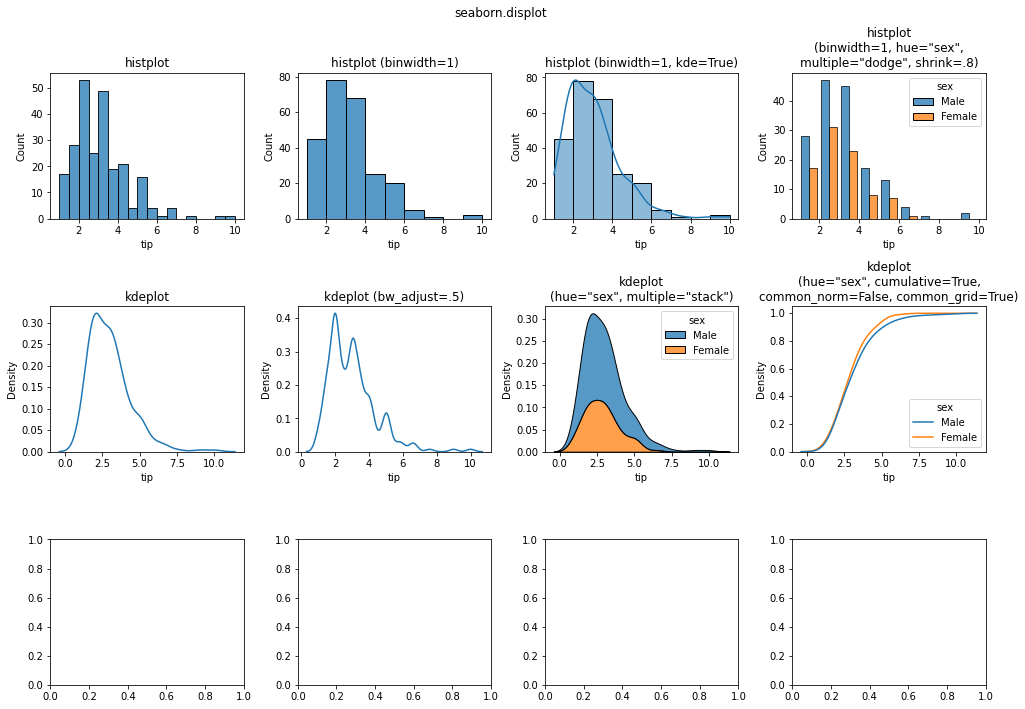

In [38]:
fig, axes = plt.subplots(3, 4, figsize=(14, 10))
fig.suptitle('seaborn.displot')

axes[0,0].set_title('histplot')
sns.histplot(ax=axes[0,0], data=tips, x='tip')
axes[0,1].set_title('histplot (binwidth=1)')
sns.histplot(ax=axes[0,1], data=tips, x='tip', binwidth=1)
axes[0,2].set_title('histplot (binwidth=1, kde=True)')
sns.histplot(ax=axes[0,2], data=tips, x='tip', binwidth=1, kde=True)
axes[0,3].set_title('histplot\n(binwidth=1, hue="sex",\nmultiple="dodge", shrink=.8)')
sns.histplot(ax=axes[0,3], data=tips, x='tip', binwidth=1, hue='sex', multiple='dodge', shrink=.8)
# 最初の消して累積を追加

axes[1,0].set_title('kdeplot')
sns.kdeplot(ax=axes[1,0], data=tips, x='tip')
axes[1,1].set_title('kdeplot (bw_adjust=.5)')
sns.kdeplot(ax=axes[1,1], data=tips, x='tip', bw_adjust=.5)
axes[1,2].set_title('kdeplot\n(hue="sex", multiple="stack")')
sns.kdeplot(ax=axes[1,2], data=tips, x='tip', hue='sex', multiple='stack')
axes[1,3].set_title('kdeplot\n(hue="sex", cumulative=True,\ncommon_norm=False, common_grid=True)')
sns.kdeplot(ax=axes[1,3], data=tips, x='tip', hue='sex', cumulative=True, common_norm=False, common_grid=True)


fig.tight_layout()

<AxesSubplot:xlabel='day', ylabel='count'>

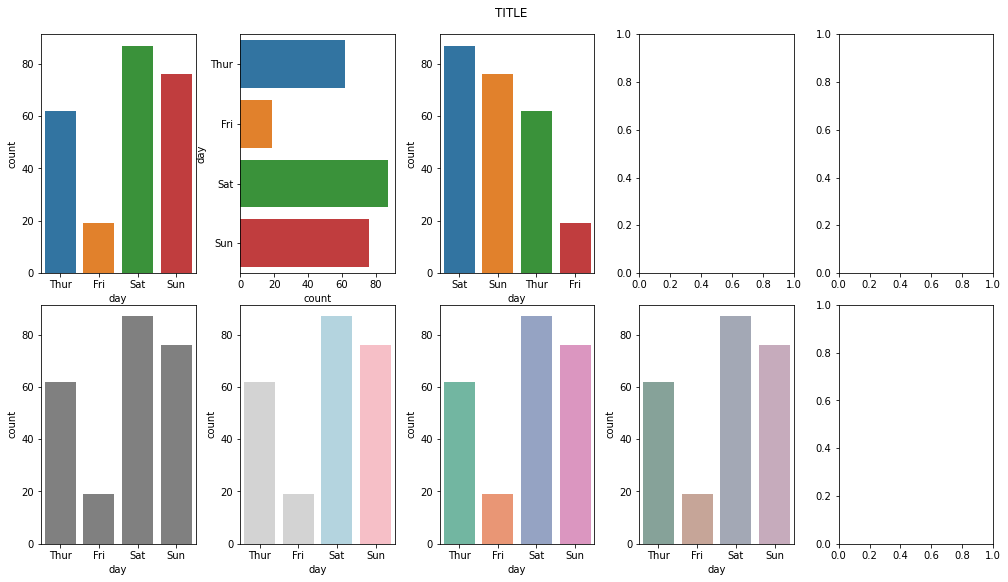

In [5]:


fig, axes = plt.subplots(2, 5, figsize=(14, 8))


fig.suptitle('TITLE')
fig.tight_layout()

sns.countplot(data=tips, x='day', ax=axes[0][0])
sns.countplot(data=tips, y='day', ax=axes[0][1])
sns.countplot(data=tips, x='day', ax=axes[0][2], order   = tips['day'].value_counts().index)
sns.countplot(data=tips, x='day', ax=axes[1][0], color   = 'grey')
sns.countplot(data=tips, x='day', ax=axes[1][1], palette = ['lightgrey', 'lightgrey', 'lightblue', 'lightpink'])
sns.countplot(data=tips, x='day', ax=axes[1][2], palette = 'Set2')
sns.countplot(data=tips, x='day', ax=axes[1][3], palette = 'Set2', saturation=0.3)